In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import requests
import time
from datetime import date
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key, g_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"
cities_df = pd.read_csv("resources/worldcities.csv")
# Range of latitudes and longitudes
#lat_range = (-90, 90)
#lng_range = (-180, 180)

In [12]:
"""
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
"""
rand_cities = cities_df.sample(600)

In [13]:
cities = rand_cities['city_ascii']

In [14]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [15]:

# set up lists to hold reponse info
response_info = [[],[],[],[],[],[]]
invalid_cities = []
# Loop through the list of cities and perform a request for data on each
i = 0
j = 1
for city in cities:
    i += 1
    response = requests.get(query_url + city).json()
    try:
        print(f"Processing Record {i} of set {j} | {city}")
        response_info[0].append(response['coord']['lon'])
        response_info[1].append(response['coord']['lat'])
        response_info[2].append(response['main']['temp_max'])
        response_info[3].append(response['main']['humidity'])
        response_info[4].append(response['clouds']['all'])
        response_info[5].append(response['wind']['speed'])
    except:
        print("City not found. Skipping...")
    if i >= 50:
        print("sleeping")
        i = 0;
        j += 1;
        time.sleep(60)

Processing Record 1 of set 1 | Tarascon
Processing Record 2 of set 1 | Godoy Cruz
Processing Record 3 of set 1 | Acarape
Processing Record 4 of set 1 | Cliftonville
Processing Record 5 of set 1 | Ispra
Processing Record 6 of set 1 | Denham
Processing Record 7 of set 1 | Spiez
Processing Record 8 of set 1 | Spelle
Processing Record 9 of set 1 | Verkhnyaya Tura
Processing Record 10 of set 1 | Santa Isabel do Ivai
Processing Record 11 of set 1 | El Metline
City not found. Skipping...
Processing Record 12 of set 1 | Paratinga
Processing Record 13 of set 1 | Shuya
Processing Record 14 of set 1 | Thomaston
Processing Record 15 of set 1 | San Miguel
Processing Record 16 of set 1 | Liujiaxia
City not found. Skipping...
Processing Record 17 of set 1 | Manor
Processing Record 18 of set 1 | Sona
Processing Record 19 of set 1 | El Ghiate
City not found. Skipping...
Processing Record 20 of set 1 | Fort Plain
Processing Record 21 of set 1 | Ciro Redondo
Processing Record 22 of set 1 | Kahla
Processi

Processing Record 33 of set 4 | Tulagi
Processing Record 34 of set 4 | Ormoc
Processing Record 35 of set 4 | Wiesendangen
Processing Record 36 of set 4 | Vernon
Processing Record 37 of set 4 | Sarnico
Processing Record 38 of set 4 | Le Loroux-Bottereau
Processing Record 39 of set 4 | Munuf
Processing Record 40 of set 4 | Klingenberg am Main
Processing Record 41 of set 4 | East Leake
Processing Record 42 of set 4 | Derzhavinsk
Processing Record 43 of set 4 | Colusa
Processing Record 44 of set 4 | Ajax
Processing Record 45 of set 4 | Linhai
Processing Record 46 of set 4 | Sutri
Processing Record 47 of set 4 | Malsch
Processing Record 48 of set 4 | Crystal Lake
Processing Record 49 of set 4 | Velen
Processing Record 50 of set 4 | Sayaxche
sleeping
Processing Record 1 of set 5 | Courrieres
Processing Record 2 of set 5 | Boulder Creek
Processing Record 3 of set 5 | Kamin-Kashyrskyi
Processing Record 4 of set 5 | Anisio de Abreu
City not found. Skipping...
Processing Record 5 of set 5 | West

Processing Record 19 of set 8 | Paisley
Processing Record 20 of set 8 | Uruapan
Processing Record 21 of set 8 | Santa Elena
Processing Record 22 of set 8 | Basoko
Processing Record 23 of set 8 | Waiblingen
Processing Record 24 of set 8 | Champniers
Processing Record 25 of set 8 | Kemijarvi
Processing Record 26 of set 8 | Gorna Oryahovitsa
Processing Record 27 of set 8 | Old Harbour
Processing Record 28 of set 8 | Xinshi
Processing Record 29 of set 8 | Malungun
Processing Record 30 of set 8 | Brookings
Processing Record 31 of set 8 | San Jose
Processing Record 32 of set 8 | Shirebrook
Processing Record 33 of set 8 | Krusevo
Processing Record 34 of set 8 | Coyotepec
Processing Record 35 of set 8 | Riegelsberg
Processing Record 36 of set 8 | Strezhevoy
Processing Record 37 of set 8 | Presidente Epitacio
Processing Record 38 of set 8 | Silvania
Processing Record 39 of set 8 | Tepic
Processing Record 40 of set 8 | Riobamba
Processing Record 41 of set 8 | St. James
City not found. Skipping..

Processing Record 50 of set 11 | Coroados
sleeping
Processing Record 1 of set 12 | Ben Lomond
Processing Record 2 of set 12 | Chiniot
Processing Record 3 of set 12 | Uffenheim
Processing Record 4 of set 12 | Vila Boa
Processing Record 5 of set 12 | Arsk
Processing Record 6 of set 12 | Santo Nino
Processing Record 7 of set 12 | Ban Plai Bua Phatthana
City not found. Skipping...
Processing Record 8 of set 12 | Gent
Processing Record 9 of set 12 | Scorrano
Processing Record 10 of set 12 | Saint-Hilaire-de-Riez
Processing Record 11 of set 12 | Gardnerville
Processing Record 12 of set 12 | Luebo
Processing Record 13 of set 12 | Little Elm
Processing Record 14 of set 12 | Shepherdstown
Processing Record 15 of set 12 | Gyongyos
Processing Record 16 of set 12 | Akure
Processing Record 17 of set 12 | Titusville
Processing Record 18 of set 12 | Rosamond
Processing Record 19 of set 12 | Borgo
Processing Record 20 of set 12 | Stanwood
Processing Record 21 of set 12 | Grossposna
Processing Record 2

In [17]:
df = pd.DataFrame(list(zip(cities, *response_info)), \
                        columns = ['City', 'Longitude', 'Latitude', 'Max Temperature', 'Humidity', 'Cloudiness', 'Wind Speed']) \
                        .set_index('City')
df.to_csv('resources/city_weather.csv')
len(df)

546

In [19]:
df.loc[df['Humidity'] > 90]

,Longitude,Latitude,Max Temperature,Humidity,Cloudiness,Wind Speed
City,,,,,,
Cliftonville,150.9178,-33.4311,72.54,95,3,0.87
Paratinga,41.3883,56.8487,11.44,95,100,7.92
Babenhausen,-1.9833,50.7833,47.80,93,3,1.99
Williamson,15.6972,46.5058,34.23,93,100,2.30
Sofiivka,13.6333,48.6500,33.37,93,100,8.19
...,...,...,...,...,...,...
Aztec,112.5831,31.1661,33.42,96,100,11.43
Harborne,59.4406,55.3383,-0.47,99,62,2.89
Marathon,45.4160,50.0983,20.91,97,100,3.85


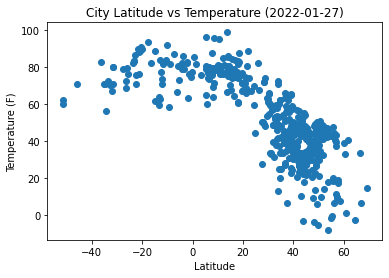

In [20]:
x=df['Latitude']
y=df['Max Temperature']
plt.title(f"City Latitude vs Temperature ({date.today()})")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.scatter(x,y)
plt.show()

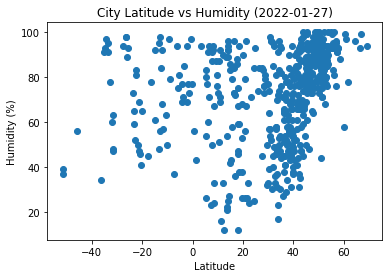

In [21]:
x=df['Latitude']
y=df['Humidity']
plt.title(f"City Latitude vs Humidity ({date.today()})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.scatter(x,y)
plt.show()

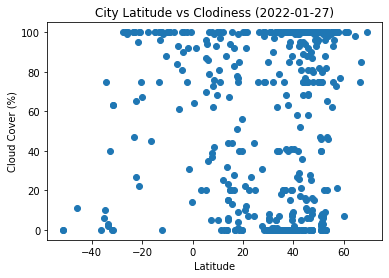

In [22]:
x=df['Latitude']
y=df['Cloudiness']
plt.title(f"City Latitude vs Clodiness ({date.today()})")
plt.xlabel("Latitude")
plt.ylabel("Cloud Cover (%)")
plt.scatter(x,y)
plt.show()

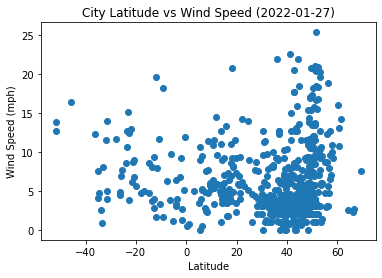

In [23]:
x=df['Latitude']
y=df['Wind Speed']
plt.title(f"City Latitude vs Wind Speed ({date.today()})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.scatter(x,y)
plt.show()

Text(0.5, 0.98, 'Linear Regression of Latitude vs Temperature (2022-01-27)')

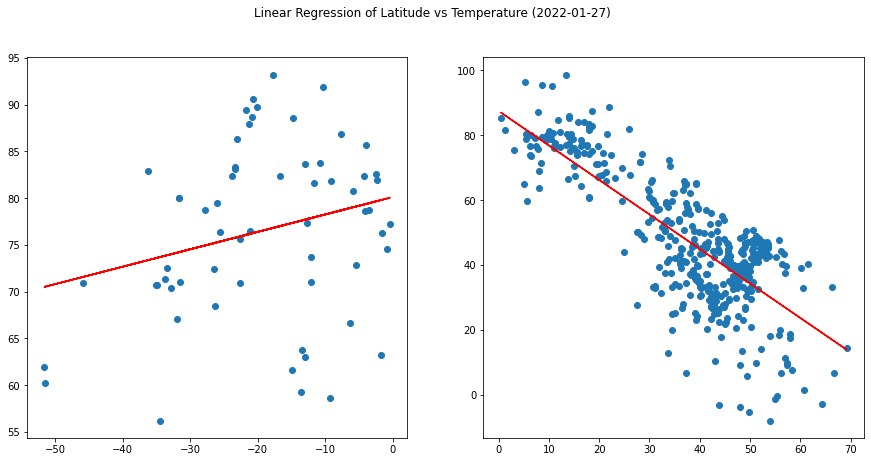

In [24]:
neglat = df.loc[df['Latitude'] < 0]
poslat = df.loc[df['Latitude'] >= 0]
x1, y1 = neglat['Latitude'], neglat['Max Temperature']
x2, y2 = poslat['Latitude'], poslat['Max Temperature']
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,7) )
slope1, intercept1, rvalue1, pvalue1, stderr1 = linregress(x1,y1)
slope2, intercept2, rvalue2, pvalue2, stderr2 = linregress(x2,y2)
ax1.scatter(x1,y1)
ax1.plot(x1, slope1 * x1 + intercept1, color = 'r')
ax2.scatter(x2,y2)
ax2.plot(x2, slope2 * x2 + intercept2, color = 'r')
fig.suptitle(f"Linear Regression of Latitude vs Temperature ({date.today()})")

Text(0.5, 0.98, 'Linear Regression of Latitude vs Humidity (2022-01-27)')

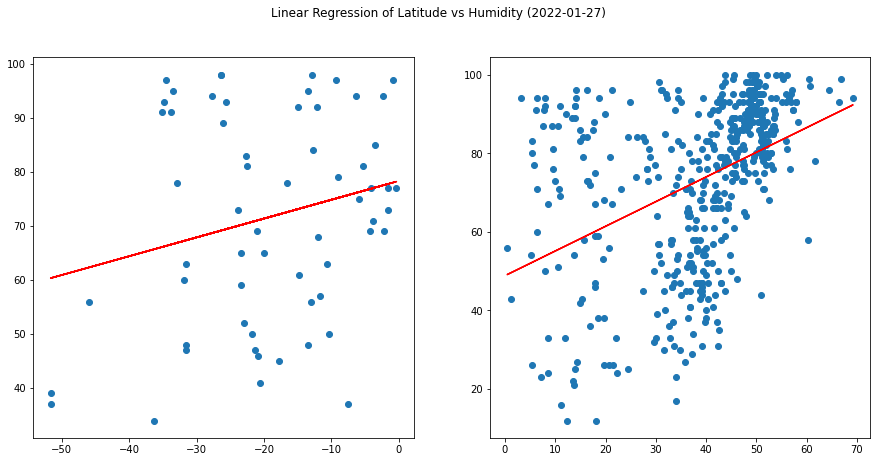

In [25]:
x1, y1 = neglat['Latitude'], neglat['Humidity']
x2, y2 = poslat['Latitude'], poslat['Humidity']
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,7) )
slope1, intercept1, rvalue1, pvalue1, stderr1 = linregress(x1,y1)
slope2, intercept2, rvalue2, pvalue2, stderr2 = linregress(x2,y2)
ax1.scatter(x1,y1)
ax1.plot(x1, slope1 * x1 + intercept1, color = 'r')
ax2.scatter(x2,y2)
ax2.plot(x2, slope2 * x2 + intercept2, color = 'r')
fig.suptitle(f"Linear Regression of Latitude vs Humidity ({date.today()})")

Text(0.5, 0.98, 'Linear Regression of Latitude vs Cloud Cover (2022-01-27)')

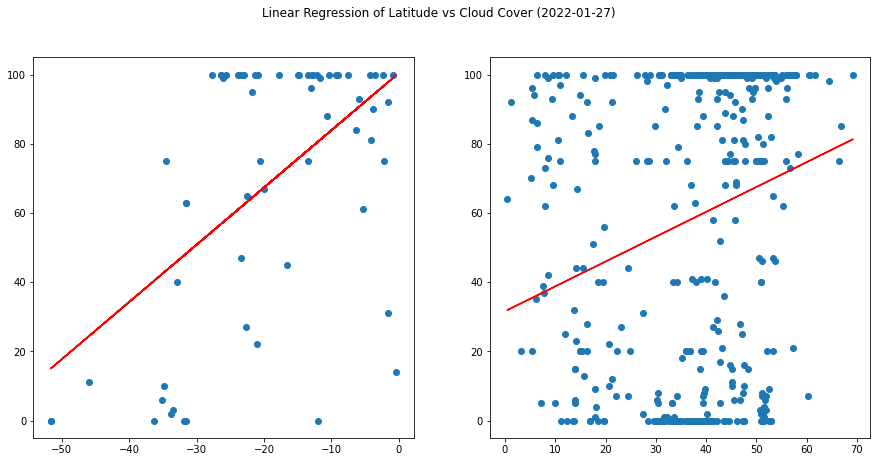

In [26]:
x1, y1 = neglat['Latitude'], neglat['Cloudiness']
x2, y2 = poslat['Latitude'], poslat['Cloudiness']
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,7) )
slope1, intercept1, rvalue1, pvalue1, stderr1 = linregress(x1,y1)
slope2, intercept2, rvalue2, pvalue2, stderr2 = linregress(x2,y2)
ax1.scatter(x1,y1)
ax1.plot(x1, slope1 * x1 + intercept1, color = 'r')
ax2.scatter(x2,y2)
ax2.plot(x2, slope2 * x2 + intercept2, color = 'r')
fig.suptitle(f"Linear Regression of Latitude vs Cloud Cover ({date.today()})")

Text(0.5, 0.98, 'Linear Regression of Latitude vs Wind Speed (2022-01-27)')

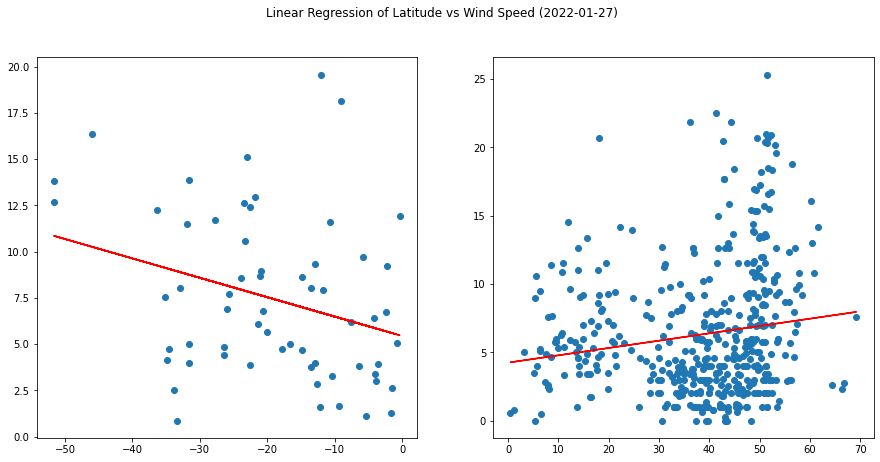

In [27]:
x1, y1 = neglat['Latitude'], neglat['Wind Speed']
x2, y2 = poslat['Latitude'], poslat['Wind Speed']
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,7) )
slope1, intercept1, rvalue1, pvalue1, stderr1 = linregress(x1,y1)
slope2, intercept2, rvalue2, pvalue2, stderr2 = linregress(x2,y2)
ax1.scatter(x1,y1)
ax1.plot(x1, slope1 * x1 + intercept1, color = 'r')
ax2.scatter(x2,y2)
ax2.plot(x2, slope2 * x2 + intercept2, color = 'r')
fig.suptitle(f"Linear Regression of Latitude vs Wind Speed ({date.today()})")